1. views about the problem statement?  

Answer:   

TechWorks Consulting wants to develop a predictive model to determine the salary of 
newly hired employees using various features and information. It emphasizes the potential of regression to predict continuous values, such as salaries, using historical employee data. By considering factors like qualifications, experience, and performance, a regression model can be trained to predict salaries for new employees.      

2. What will be your approach to solving this task? 

Answer:  
- Clearly understand the problem statement and the objective of predicting employee salaries based on various features.  
- Explore the dataset to understand its structure, features, and any initial insights.  
- Import all the required library to perform EDA Like
  - how to handle missing values (remove, impute) for each feature if present.  
  - Identify outliers and decide whether to remove or transform them based on their impact on the model. 
  - Convert categorical variables into numerical representations because ML model does not understand categorical variables  
  - Scale numerical features to a common range to prevent one feature from dominating others.
  - create graph and chart to observe the trend of the data.
- After performing EDA
- Split the dataset into training and testing subsets.
- Choose regression models for the task like Multiple linear regression,Ridge, Lasso, Decision tree, Random forest etc and compare which is giving highest accuracy.

3. What were the available ML model options you had to perform this task?  

Answer:  
    
I will be experimenting with algorithim:

1.Multiple linear regression
- Multiple linear regression before applying Backward Elimination Method
- Multiple linear regression After applying Backward Elimination Method
2.Ridge  
3.Lasso  
4.Validation Curve  
- Using Ridge
- Using Lasso
5.Decision Tree  
6.Random Forest  
7.GridSearchCV  
- using Decision Tree
- using Random Forest
8.Bagging  
- using Decision Tree
- using Random Forest
9.Gradient Boosting  
10.Ada Boost  
11.XG Boost  


4. Which model’s performance is best and what could be the possible reason for that?

Answer:  

Bagging using Random forest is performimg best among them.
Bagging is used to improve the accuracy of random forests. Random forests are a type of ensemble model that uses bagging to combine multiple decision trees.  
- Bagging reduces the variance of a model by averaging the predictions of multiple models.
- Bagging makes models more stable and less sensitive to small variations in the training data. It smoothens out the decision boundaries, making the model more robust.
- Bagging can often improve the accuracy of a model by averaging out the errors of multiple models.
- Bagging is generally robust to outliers because it combines predictions from multiple models.
-  Bagging can be applied to a wide range of base models, including decision trees, random forest, and more. It's a versatile technique that can enhance the performance of various algorithms.


5. What steps can you take to improve this selected model’s performance even further?   

Answer:  

- Experiment with different hyperparameters of the base model and the bagging ensemble to find the optimal combination.
- Adjust parameters like n_estimators, criterion,max_depth,min_samples_split,min_samples_leaf etc
- Identify and select the most relevant features for prediction.
- Improve data preprocessing techniques, such as better encoding of categorical variables, and more effective scaling or normalization.
- Utilize cross-validation to assess the model's generalization performance on different subsets of the data

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Datasets
df=pd.read_csv("ML_case_Study.csv")

In [3]:
# Load Datasets
df1=pd.read_csv("Colleges.csv")
df2=pd.read_csv("cities.csv")

In [4]:
# to see top 5 data
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [5]:
# to see last 5 data
df.tail()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09
1588,R.V. College of Engineering,Delhi,Manager,44353.0,3,75,18,70056.31


# Exploratory Data Analysis

### Before training the model, we need to observe and analyse the data.

In [6]:
# checking null values
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [7]:
# size of the dataset
df.shape

(1589, 8)

In [8]:
# checking the type of dataset
df.dtypes

College                 object
City                    object
Role                    object
Previous CTC           float64
Previous job change      int64
Graduation Marks         int64
EXP (Month)              int64
CTC                    float64
dtype: object

In [9]:
# information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [10]:
# to see top 5 data
df1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
# to see top 5 data
df2.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


#### Converting from dataframe to list of College Data

In [12]:
tier1=df1.iloc[:,0].values.tolist()
tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [13]:
tier2=df1.iloc[:,1].values.tolist()
tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [14]:
tier3=df1.iloc[:,2].values.tolist()
tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [15]:
# Creating new column "Tier" that will show which college comes under which tier
for index, row in df.iterrows():
    if row['College'] in tier1:
        df.loc[index, 'Tier'] = 'tier1'
    elif row['College'] in tier2:
        df.loc[index, 'Tier'] = 'tier2'
    elif row['College'] in tier3:
        df.loc[index, 'Tier'] = 'tier3'

In [16]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier1


#### Converting from dataframe to list o fCities data

In [17]:
metro=df2.iloc[:,0].values.tolist()
metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [18]:
non_metro=df2.iloc[:,1].values.tolist()
non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [19]:
# Creating new column "Cities" to categorise them under metro or non-mtero
for index, row in df.iterrows():
    if row['City'] in metro:
        df.loc[index,'Cities'] = 'metro'
    elif row['City'] in non_metro:
        df.loc[index,'Cities'] = 'non_metro'

In [20]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,Cities
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier2,non_metro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier2,non_metro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier3,non_metro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier3,non_metro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier1,non_metro


In [21]:
# dropping College and City from Dataframe
df.drop(['College','City'],axis=1,inplace=True)

In [22]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,Cities
0,Manager,55523.0,3,66,19,71406.58,tier2,non_metro
1,Executive,57081.0,1,84,18,68005.87,tier2,non_metro
2,Executive,60347.0,2,52,28,76764.02,tier3,non_metro
3,Executive,49010.0,2,81,33,82092.39,tier3,non_metro
4,Executive,57879.0,4,74,32,73878.10,tier1,non_metro


In [23]:
# unique data present in the role
df['Role'].unique()

array(['Manager', 'Executive'], dtype=object)

C:\Users\Navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

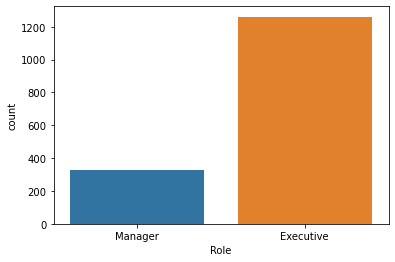

In [24]:
# Count of role data
sns.countplot('Role',data=df)

In [25]:
# checking null values
df.isnull().sum()

Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Tier                   0
Cities                 0
dtype: int64

In [26]:
# Converting categorical data into numerical
df = pd.get_dummies(df,columns = ["Role",'Tier','Cities'])
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3,Cities_metro,Cities_non_metro
0,55523.0,3,66,19,71406.58,0,1,0,1,0,0,1
1,57081.0,1,84,18,68005.87,1,0,0,1,0,0,1
2,60347.0,2,52,28,76764.02,1,0,0,0,1,0,1
3,49010.0,2,81,33,82092.39,1,0,0,0,1,0,1
4,57879.0,4,74,32,73878.10,1,0,1,0,0,0,1


In [27]:
# droping 'Cities_non_metro' column from dataset
df.drop(['Cities_non_metro'],axis=1,inplace=True)

In [28]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3,Cities_metro
0,55523.0,3,66,19,71406.58,0,1,0,1,0,0
1,57081.0,1,84,18,68005.87,1,0,0,1,0,0
2,60347.0,2,52,28,76764.02,1,0,0,0,1,0
3,49010.0,2,81,33,82092.39,1,0,0,0,1,0
4,57879.0,4,74,32,73878.10,1,0,1,0,0,0


In [29]:
# Detalied dataset
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3,Cities_metro
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419,0.363751,0.297042,0.339207,0.514160
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862,0.481230,0.457099,0.473589,0.499957
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Navin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Navin\anaconda3\lib\si

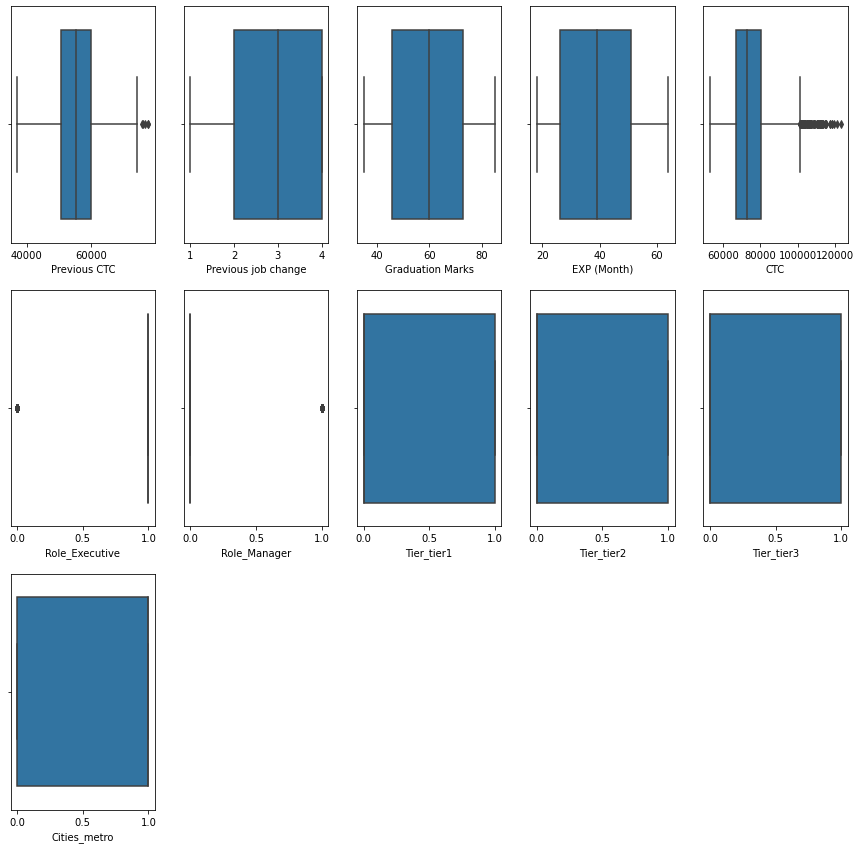

In [30]:
# using boxplot to observe the distribution of the data and outlier present in the dataset.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))
for i, var in enumerate(df):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[var])

Conclusion:  
As we can observe from the above graph, No outlier are present in the dataset

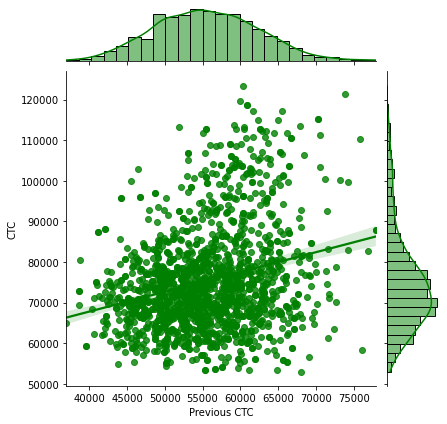

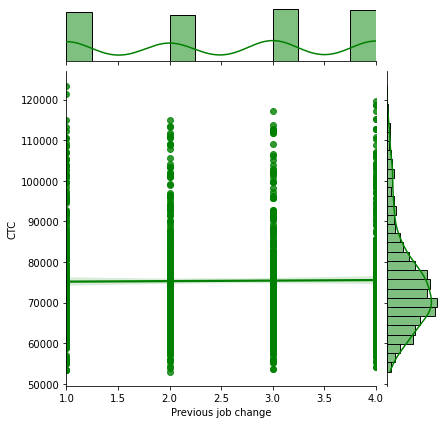

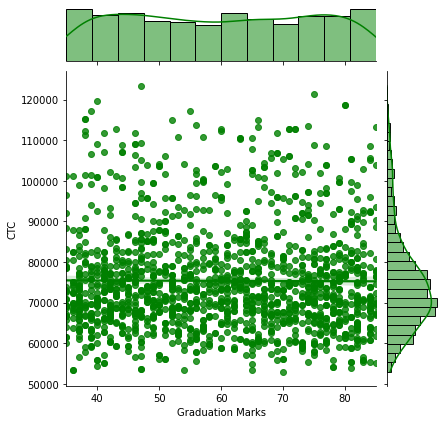

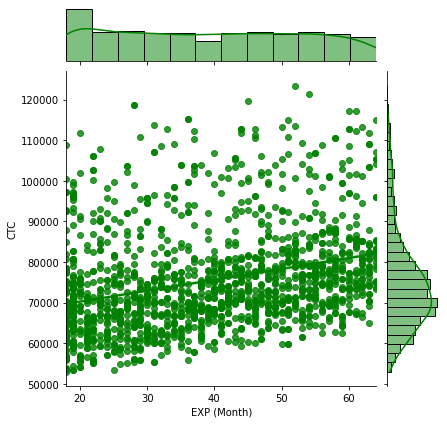

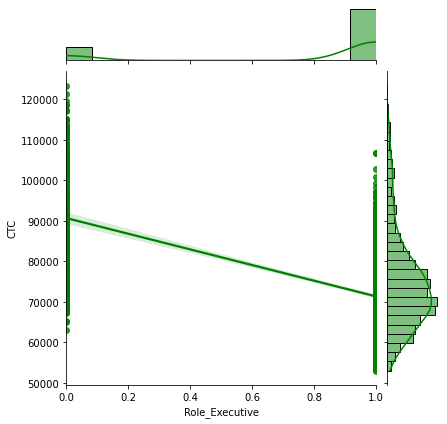

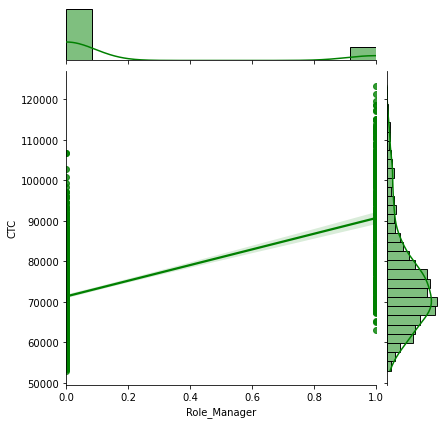

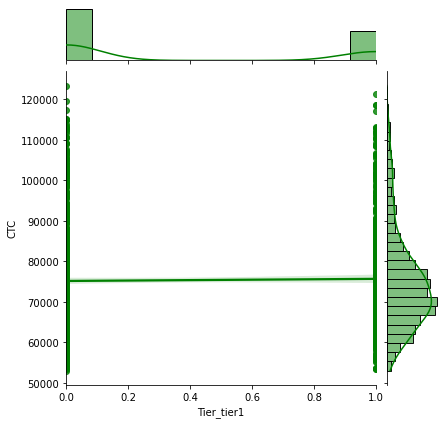

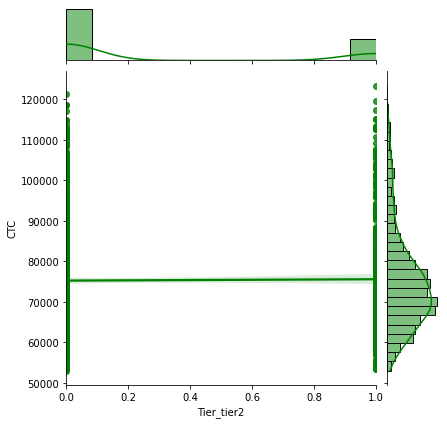

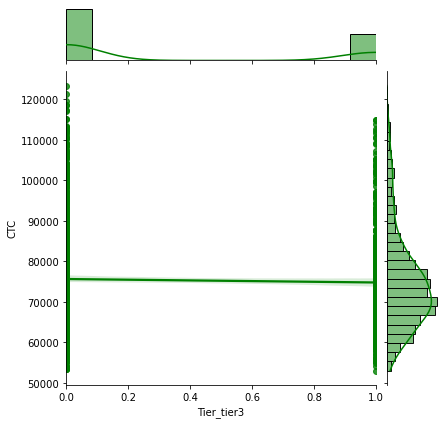

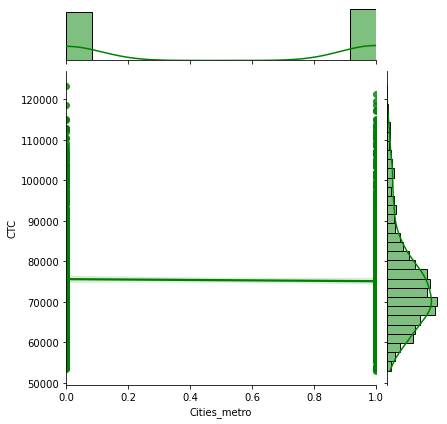

In [31]:
# Creating scatterplot to observe the trend of the data
for i, var in enumerate(df):
    if var=='CTC':
        continue
    sns.jointplot(x=var,y='CTC',data=df,kind='reg',color='g')

Conclusion:  
As we can observe that from above graph:-  
- CTC and Previous CTC have postive relatioship, as Previous CTC increses, CTC also increses     
- CTC and EXP(month) have postive relationship, as EXP(month) increases, CTC also Increases    
- CTC and Role_manager have postive relationship, as Role_manager increases, CTC also Increases   
- CTC and Role_Executive have negative relationship, as Role_Executive increase, CTC Decreses  
- Other Variables are not affecting much

### Correlation Matrix

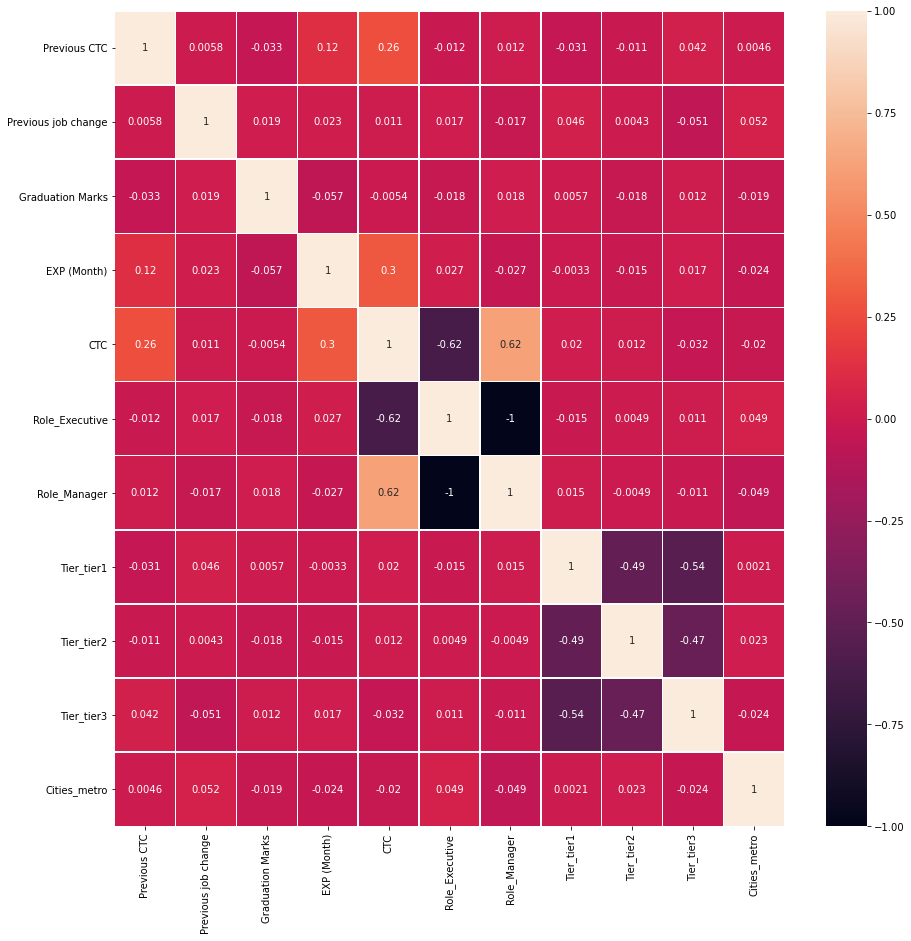

In [32]:
#  correlation matrix of dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

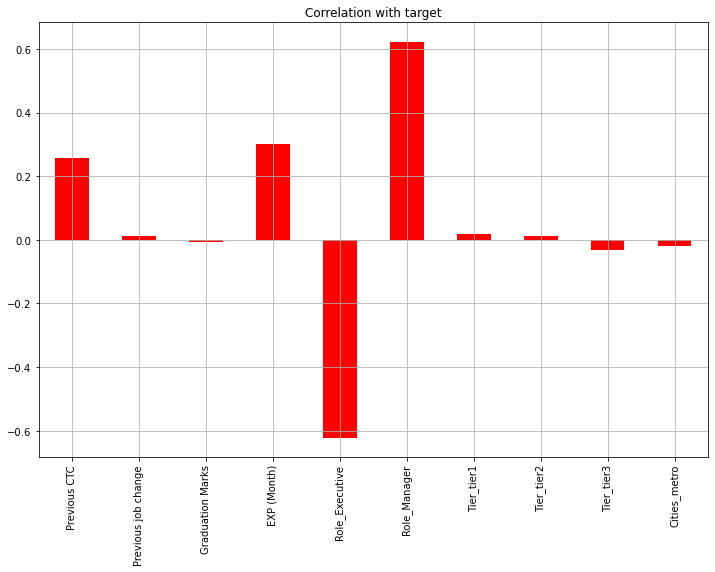

In [33]:
# Co-realtion with Depended Varibale
df.drop('CTC', axis=1).corrwith(df.CTC).plot(kind='bar', figsize=(12, 8), grid=True,color='r',
                                                   title="Correlation with target")

Conclusion:  
From the above graph we can observe that:  
Previous CTC, EXP(Month), Role_Manager are positively co-related with depended variables
and Role_Executive are negatively co-related with depended variables.  
Others variables are not affecting much.

In [34]:
# spliting the dataset into features(independend variables) and target(dependent variables)
X=df.drop('CTC',axis=1)
y=df['CTC']

In [35]:
X.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3,Cities_metro
0,55523.0,3,66,19,0,1,0,1,0,0
1,57081.0,1,84,18,1,0,0,1,0,0
2,60347.0,2,52,28,1,0,0,0,1,0
3,49010.0,2,81,33,1,0,0,0,1,0
4,57879.0,4,74,32,1,0,1,0,0,0


In [36]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


In [39]:
X_train.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3,Cities_metro
1062,61410.0,4,83,59,0,1,1,0,0,0
215,59781.0,1,46,41,1,0,1,0,0,1
654,62521.0,1,70,59,1,0,1,0,0,0
55,66624.0,1,63,58,0,1,1,0,0,0
1187,54621.0,2,52,62,1,0,0,0,1,0


### Backward Elimination

Backward elimination is a feature selection technique while building a machine learning model. It is used
to remove those features that do not have significant effect on dependent variable or prediction of output

In [40]:
#Importing the library:
import statsmodels.api as sn

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [41]:
# Applying backward elimination process now Firstly we will create a new feature x, 
# which will only contain a set of independent features that are significantly 
# affecting the dependent variable.
x=sn.add_constant(X.iloc[:,[0,1,2,3,4,5,6,7,8,9]])

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [42]:
#for fitting the model, we will create a lm object of new class OLS of 
#statsmodels library. Then we will fit it by using the fit() method.
lm=sn.OLS(y,x).fit()

In [43]:
#We will use summary() method to get the summary table of all the variables.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     227.1
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          3.36e-256
Time:                        17:13:01   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1580   BIC:                         3.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.573e+04   1172.349     21.949      0.000    2.34e+04     2.8e+04
Previous CTC            0.4105      0.033     12.542      0.000       0.346       0.475
Previous job change   125.3208    192.846      0.650      0.516    -252.941     503.582
Graduation Marks        6.6007     14.501      0.455      0.649     -21.843      35.044
EXP (Month)           261.6302     15.458     16.925      0.000     231.309     291.951
Role_Executive       3121.2698    625.065      4.994      0.000    1895.226    4347.313
Role_Manager         2.261e+04    662.859     34.111      0.000    2.13e+04    2.39e+04
Tier_tier1           8859.9552    487.502     18.174      0.000    7903.737    9816.174
Tier_tier2           8989.0489    499.819     17.985      0.000    8008.671    9969.426
Tier_tier3           7883.2689    503.244     15.665      0.000    6896.173    8870.365
Cities_metro          368.3233    433.465      0.850      0.396    -481.903    1218.550
==============================================================================
Omnibus:                       48.290   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.258
Skew:                           0.405   Prob(JB):                     2.72e-12
Kurtosis:                       3.384   Cond. No.                     3.91e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion:  
In the above summary table, we can clearly see the p-values of all the variables.   
Now since 'Graduation Marks' has highest p-value greater than 0.05, hence, will remove the 'Graduation Marks' variable from the table and will refit the model.

In [44]:
# to get the summary table of all the variables
x=sn.add_constant(X.iloc[:,[0,1,3,4,5,6,7,8,9]])
lm=sn.OLS(y,x).fit()
lm.summary()

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          2.23e-257
Time:                        17:13:01   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.597e+04   1052.535     24.671      0.000    2.39e+04     2.8e+04
Previous CTC            0.4101      0.033     12.538      0.000       0.346       0.474
Previous job change   127.2909    192.749      0.660      0.509    -250.781     505.362
EXP (Month)           261.2477     15.432     16.929      0.000     230.979     291.516
Role_Executive       3236.6863    571.183      5.667      0.000    2116.331    4357.042
Role_Manager         2.273e+04    608.640     37.346      0.000    2.15e+04    2.39e+04
Tier_tier1           8938.7849    455.590     19.620      0.000    8045.161    9832.408
Tier_tier2           9064.5431    471.381     19.230      0.000    8139.946    9989.140
Tier_tier3           7963.7146    471.072     16.906      0.000    7039.722    8887.707
Cities_metro          364.4559    433.273      0.841      0.400    -485.394    1214.305
==============================================================================
Omnibus:                       48.439   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.486
Skew:                           0.405   Prob(JB):                     2.43e-12
Kurtosis:                       3.388   Cond. No.                     3.62e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion:  
In the above summary table, we can clearly see the p-values of all the variables.  
Now since 'Previous job change' has highest p-value greater than 0.05, hence, will remove the 'Previous job change' variable from the table and will refit the model.

In [45]:
# to get the summary table of all the variables
x_opt=x=sn.add_constant(X.iloc[:,[0,3,4,5,6,7,8,9]])
lm=sn.OLS(y,x).fit()
lm.summary()

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     302.9
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          1.53e-258
Time:                        17:13:01   Log-Likelihood:                -16647.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1582   BIC:                         3.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.613e+04   1023.389     25.532      0.000    2.41e+04    2.81e+04
Previous CTC       0.4103      0.033     12.544      0.000       0.346       0.474
EXP (Month)      261.4950     15.424     16.953      0.000     231.241     291.749
Role_Executive  3320.2880    556.878      5.962      0.000    2227.991    4412.585
Role_Manager    2.281e+04    596.862     38.214      0.000    2.16e+04     2.4e+04
Tier_tier1      9001.7012    445.438     20.209      0.000    8127.991    9875.412
Tier_tier2      9119.4627    463.904     19.658      0.000    8209.531       1e+04
Tier_tier3      8007.8203    466.231     17.176      0.000    7093.325    8922.316
Cities_metro     378.9267    432.641      0.876      0.381    -469.684    1227.537
==============================================================================
Omnibus:                       49.123   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.373
Skew:                           0.408   Prob(JB):                     1.56e-12
Kurtosis:                       3.396   Cond. No.                     6.20e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion:  
In the above summary table, we can clearly see the p-values of all the variables.  
Now since 'Cities_metro' has highest p-value greater than 0.05, hence, will remove the 'Cities_metro' variable from the table and will refit the model.

In [46]:
# to get the summary table of all the variables
x_opt=x=sn.add_constant(X.iloc[:,[0,3,4,5,6,7,8]])
lm=sn.OLS(y,x).fit()
lm.summary()

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     363.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          1.12e-259
Time:                        17:13:01   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1583   BIC:                         3.334e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.623e+04   1016.661     25.801      0.000    2.42e+04    2.82e+04
Previous CTC       0.4105      0.033     12.553      0.000       0.346       0.475
EXP (Month)      261.1523     15.418     16.938      0.000     230.910     291.395
Role_Executive  3382.9100    552.229      6.126      0.000    2299.734    4466.086
Role_Manager    2.285e+04    595.119     38.393      0.000    2.17e+04     2.4e+04
Tier_tier1      9036.2359    443.656     20.368      0.000    8166.020    9906.452
Tier_tier2      9159.7507    461.584     19.844      0.000    8254.370    1.01e+04
Tier_tier3      8035.0344    465.160     17.274      0.000    7122.640    8947.429
==============================================================================
Omnibus:                       49.590   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.017
Skew:                           0.409   Prob(JB):                     1.13e-12
Kurtosis:                       3.403   Cond. No.                     3.53e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion:   
By observing the above data we can say that all are significant variable for the model. these are the varibale which has highest impact on the Target variable   
For example as we increase previous ctc, exp etc. ctc will increase but as we increse Role_executive ctc will decrease

# Model Building
I will be experimenting with algorithim:

1.Multiple linear regression
-   Multiple linear regression before applying Backward Elimination Method    
-   Multiple linear regression After applying Backward Elimination Method   
2.Ridge  
3.Lasso  
4.Validation Curve  
-   Using Ridge
-   Using Lasso
5.Decision Tree   
6.Random Forest   
7.GridSearchCV
- using Decision Tree
- using Random Forest
8.Bagging  
- using Decision Tree
- using Random Forest
9.Gradient Boosting  
10.Ada Boost  
11.XG Boost

## Multiple linear regression before applying Backward Elimination Method

In [47]:
# import Libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
regressor = LinearRegression()

In [48]:
# Fit the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
#Calculating the coefficients:
print(regressor.coef_)

[ 4.29560583e-01  9.16241174e+01  1.01809891e+01  2.57802465e+02
 -9.62636903e+03  9.62636903e+03  2.20836623e+02  3.59103585e+02
 -5.79940208e+02  9.14527889e+02]


In [50]:
#Calculating the intercept:
print(regressor.intercept_)

45804.703862026414


In [51]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [52]:
# Accuracy of the model

#Calculating the r squared value and mse:

print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy of the model: ", r2_score(y_test,y_pred))

MSE:  68751323.92959404
Accuracy of the model:  0.5366674761765406


## Multiple linear regression After applying Backward Elimination Method

In [53]:
#Extracting Independent and dependent Variable
X_BE=X.drop(['Previous job change','Graduation Marks','Cities_metro'],axis=1)
y_BE=df['CTC']

In [54]:
X_BE.head()

,Previous CTC,EXP (Month),Role_Executive,Role_Manager,Tier_tier1,Tier_tier2,Tier_tier3
0,55523.0,19,0,1,0,1,0
1,57081.0,18,1,0,0,1,0
2,60347.0,28,1,0,0,0,1
3,49010.0,33,1,0,0,0,1
4,57879.0,32,1,0,1,0,0


In [55]:
# Splitting the dataset into the Training set and Test set
X_train_BE, X_test_BE, y_train_BE, y_test_BE = train_test_split(X_BE, y_BE, test_size = 0.2, random_state = 0)

In [56]:
# Fitting Linear Regression to the Training set
regressor_BE = LinearRegression()
regressor_BE.fit(X_train_BE, y_train_BE)

LinearRegression()

In [57]:
#Calculating the coefficients:
print(regressor_BE.coef_)

[ 4.31101953e-01  2.56547951e+02 -9.60400118e+03  9.60400118e+03
  2.28020570e+02  3.85633516e+02 -6.13654085e+02]


In [58]:
#Calculating the intercept:
print(regressor_BE.intercept_)

47060.89219574822


In [59]:
# Predicting the Test set results 
y_pred_BE = regressor_BE.predict(X_test_BE)

In [60]:
# Accuracy of the model

#Calculating the r squared value and mse:

print("MSE: ", mean_squared_error(y_test_BE,y_pred_BE))
print("Accuracy of the model: ", r2_score(y_test_BE,y_pred_BE))

MSE:  67723983.59508029
Accuracy of the model:  0.5435909819770013


Conclusion:  
As we can observe from the above that the X_BE and y_BE giving better accuracy than X and y. Now I will build all the model by spliting X_BE and y_BE data.

## Ridge

In [61]:
# Import Library
from sklearn.linear_model import Ridge
from sklearn import preprocessing

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias.     

So, to deal with this potential problem, we need to standardize the data

In [62]:
scaler=preprocessing.StandardScaler().fit(X_train_BE)

In [63]:
X_train_s=scaler.transform(X_train_BE)

In [64]:
X_test_s=scaler.transform(X_test_BE)

In [65]:
# Fit the model on the training data
lm_r=Ridge(alpha=1)
lm_r.fit(X_train_s,y_train_BE)

Ridge(alpha=1)

In [66]:
# Predicting the Test set results 
y_pred_lm_r=lm_r.predict(X_test_s)

In [67]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,y_pred_lm_r))
print("Accuracy of the model: ",r2_score(y_test_BE,y_pred_lm_r))

MSE:  67726112.21770285
Accuracy of the model:  0.5435766366519135


## Lasso

In [68]:
# import Library
from sklearn.linear_model import Lasso

In [69]:
# Fit the model on the training data
lm_l=Lasso(alpha=1)
lm_l.fit(X_train_s,y_train_BE)

Lasso(alpha=1)

In [70]:
# Predicting the Test set results 
y_pred_lm_l=lm_l.predict(X_test_s)

In [71]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,y_pred_lm_l))
print("Accuracy of the model: ",r2_score(y_test_BE,y_pred_lm_l))

MSE:  67724956.99669883
Accuracy of the model:  0.5435844219778212


### Validation curve using Ridge

In [72]:
# Import Library
from sklearn.model_selection import validation_curve

In [73]:
# Define the range of hyperparameter values to test
param_range=np.logspace(-2,8,100)

In [74]:
# Create a validation curve:
train_scores_r,test_scores_r=validation_curve(Ridge(),X_train_s,y_train_BE,'alpha',param_range,scoring='r2')
train_mean_r=np.mean(train_scores_r,axis=1)
test_mean_r=np.mean(test_scores_r,axis=1)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.722

In [75]:
max(test_mean_r)

0.526024425838626

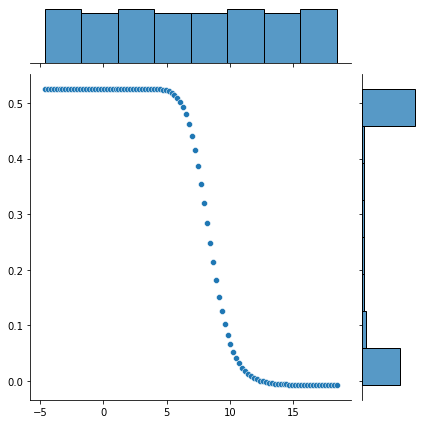

In [76]:
# Plot the validation curve
sns.jointplot(x=np.log(param_range),y=test_mean_r)

In [77]:
np.where(test_mean_r==max(test_mean_r))

(array([27], dtype=int64),)

In [78]:
param_range[27]

5.336699231206307

In [79]:
lm_r_best=Ridge(alpha=param_range[27])

In [80]:
# Fit the model on the training data
lm_r_best.fit(X_train_s,y_train_BE)

Ridge(alpha=5.336699231206307)

In [81]:
# Predicting the Test set results 
yp_pred_ll=lm_r_best.predict(X_test_s)

In [82]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,yp_pred_ll))
print("Accuracy of the model: ",r2_score(y_test_BE,yp_pred_ll))
r2_score(y_test_BE,yp_pred_ll)

MSE:  67735731.17751834
Accuracy of the model:  0.5435118120540275


0.5435118120540275

### Validation Curve using Lasso

In [83]:
# Define the range of hyperparameter values to test
param_range=np.logspace(-2,6,100)

In [84]:
# Create a validation curve:
train_scores_l,test_scores_l=validation_curve(Lasso(),X_train_s,y_train_BE,'alpha',param_range,scoring='r2')
train_mean_l=np.mean(train_scores_l,axis=1)
test_mean_l=np.mean(test_scores_l,axis=1)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.20450354e-02 1.45082878e-02 1.74752840e-02
 2.10490414e-02 2.53536449e-02 3.05385551e-02 3.67837977e-02
 4.43062146e-02 5.33669923e-02 6.42807312e-02 7.74263683e-02
 9.32603347e-02 1.12332403e-01 1.35304777e-01 1.62975083e-01
 1.96304065e-01 2.36448941e-01 2.84803587e-01 3.43046929e-01
 4.13201240e-01 4.97702356e-01 5.99484250e-01 7.22080902e-01
 8.69749003e-01 1.04761575e+00 1.26185688e+00 1.51991108e+00
 1.83073828e+00 2.20513074e+00 2.65608778e+00 3.19926714e+00
 3.85352859e+00 4.64158883e+00 5.59081018e+00 6.73415066e+00
 8.11130831e+00 9.77009957e+00 1.17681195e+01 1.41747416e+01
 1.70735265e+01 2.05651231e+01 2.47707636e+01 2.98364724e+01
 3.59381366e+01 4.32876128e+01 5.21400829e+01 6.28029144e+01
 7.56463328e+01 9.11162756e+01 1.09749877e+02 1.32194115e+02
 1.59228279e+02 1.91791026e+02 2.31012970e+02 2.78255940e+02
 3.35160265e+02 4.037

In [85]:
max(test_mean_l)

0.5260769515953175

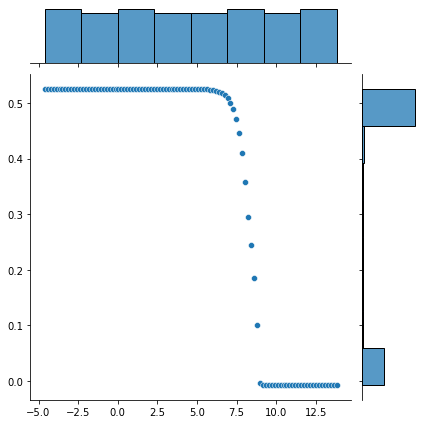

In [86]:
# Plot the validation curve
sns.jointplot(x=np.log(param_range),y=test_mean_l)

In [87]:
np.where(test_mean_l==max(test_mean_l))


(array([46], dtype=int64),)

In [88]:
param_range[46]

52.140082879996896

In [89]:
lm_l_best=Lasso(alpha=param_range[46])

In [90]:
# Fit the model on the training data
lm_l_best.fit(X_train_s,y_train_BE)

Lasso(alpha=52.140082879996896)

In [91]:
# Predicting the Test set results 
y_pred_lm_la=lm_l_best.predict(X_test_s)

In [93]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,y_pred_lm_la))
print("Accuracy of the model: ",r2_score(y_test_BE,y_pred_lm_la))

MSE:  67782427.23227455
Accuracy of the model:  0.5431971155556017


## Decision Tree

In [94]:
# import libraries
from sklearn import tree
from IPython.display import Image
import pydotplus

In [95]:
# Create a Decision Tree Regressor
regtree = tree.DecisionTreeRegressor(min_samples_leaf = 50, max_depth=5)

In [96]:
# Fit the model on the training data
regtree.fit(X_train_BE, y_train_BE)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)

In [97]:
# Predicting the Test set results 
y_pred_regtree = regtree.predict(X_test_BE)

In [98]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,y_pred_regtree ))
print("Accuracy of the model: ",r2_score(y_test_BE,y_pred_regtree ))

MSE:  60288876.01163898
Accuracy of the model:  0.593698048497824


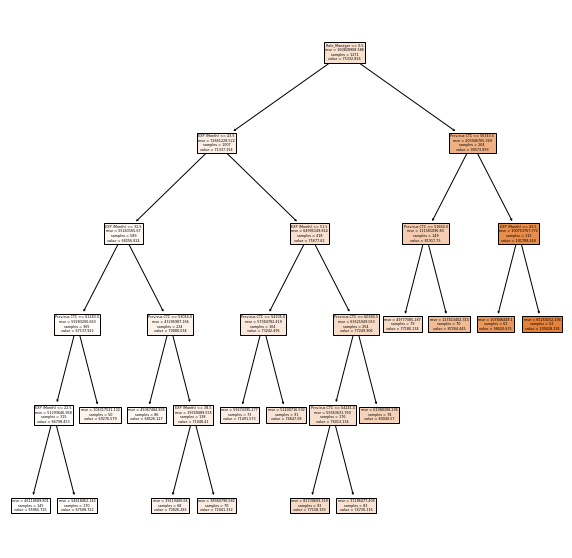

In [99]:
# plotting decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
tree.plot_tree(regtree, feature_names=X_train_BE.columns, filled=True)
plt.show()

## Random Forest

In [100]:
# import library
from sklearn.ensemble import RandomForestRegressor

In [101]:
# Create a Random forest Regressor
regforest = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)

In [102]:
# Fit the model on the training data
regforest.fit(X_train_BE, y_train_BE)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [103]:
# Predicting the Test set results
y_pred_regforest = regforest.predict(X_test_BE)

In [104]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ", mean_squared_error(y_test_BE,y_pred_regforest ))
print("Accuracy of the model: ",r2_score(y_test_BE,y_pred_regforest))

MSE:  54775331.167208105
Accuracy of the model:  0.6308552187451937


## GridSearch CV
#### Using Decision Tree

In [105]:
# Import Libraries
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [106]:
# Create a Decision Tree Regressor
regtree_cv = tree.DecisionTreeRegressor()

In [107]:
# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 4,5, 6],
    'min_samples_split': [2, 5, 6,8,10],
    'min_samples_leaf': [10, 22, 45,60,70,90]
}

In [108]:
# Create GridSearchCV
grid_search_acc = GridSearchCV(regtree_cv, param_grid, cv=5, n_jobs=-1,scoring='accuracy')

In [109]:
# Create GridSearchCV
grid_search_mse= GridSearchCV(regtree_cv, param_grid, cv=5,n_jobs=-1, scoring='neg_mean_squared_error')

In [110]:
# Fit the model on the training data
grid_search_acc.fit(X_train_BE, y_train_BE)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 22, 45, 60, 70, 90],
                         'min_samples_split': [2, 5, 6, 8, 10]},
             scoring='accuracy')

In [111]:
# Fit the model on the training data
grid_search_mse.fit(X_train_BE, y_train_BE)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 22, 45, 60, 70, 90],
                         'min_samples_split': [2, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [112]:
# Get the best parameters
best_params_acc = grid_search_acc.best_params_
print("Best Parameters for accuracy:", best_params_acc)
best_params_mse = grid_search_mse.best_params_
print("Best Parameters MSE:", best_params_mse)

Best Parameters for accuracy: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Parameters MSE: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [113]:
# Make predictions using the best model for Accuracy
best_regressor_acc= grid_search_acc.best_estimator_
y_pred_regtree_acc = best_regressor_acc.predict(X_test_BE)

In [114]:
# Make predictions using the best model for MSE
best_regressor_mse = grid_search_mse.best_estimator_
y_pred_regtree_mse = best_regressor_mse.predict(X_test_BE)

In [115]:
# Accuracy of the model for Accuracy

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_regtree_acc))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_regtree_acc))


MSE:  60424631.02613475
Accuracy of the model:  0.5927831611924911


In [116]:
# Accuracy of the model for MSE

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_regtree_mse))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_regtree_mse))

MSE:  58601838.897289276
Accuracy of the model:  0.6050674173957374


## GridSearch CV
#### using Random Forest

In [117]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [118]:
# Create a Random Forest Regressor
regforest_cv = RandomForestRegressor()

In [119]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [10, 20, 40,50]
}

In [120]:
# Create GridSearchCV
grid_search_facc = GridSearchCV(regforest_cv, param_grid, cv=5,n_jobs=-1, scoring='accuracy')

In [121]:
# Fit the model on the training data
grid_search_facc.fit(X_train_BE, y_train_BE)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': [10, 20, 40, 50],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [122]:
# Get the best parameters
best_params_facc = grid_search_facc.best_params_
print("Best Parameters for accuracy:", best_params_facc)

Best Parameters for accuracy: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [123]:
# Make predictions using the best model for Accuracy
best_regressor_facc= grid_search_facc.best_estimator_
y_pred_regtree_facc = best_regressor_facc.predict(X_test_BE)

In [124]:
# Accuracy of the model for Accuracy

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_regtree_facc))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_regtree_facc))

MSE:  56100932.09494801
Accuracy of the model:  0.6219216595302259


## Bagging
#### using decision tree

In [125]:
# Import Library
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

In [126]:
# Create a Decision Tree Regressor
regtree_bag = tree.DecisionTreeRegressor()

In [127]:
# Create a Bagging Regressor
bagging_regressor = BaggingRegressor(regtree_bag, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [128]:
# Fit the Bagging Regressor on the training data
bagging_regressor.fit(X_train_BE, y_train_BE)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=0)

In [129]:
# Make predictions
y_pred_bagtree = bagging_regressor.predict(X_test_BE)

In [130]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_bagtree))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_bagtree))

MSE:  54736386.351987205
Accuracy of the model:  0.6311176776840879


## Bagging
#### using Random Forest

In [131]:
# import libraries
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [132]:
# Create a Random Tree Regressor
regforest_bag = RandomForestRegressor()

In [133]:
# Create a Bagging Regressor
bagging_regressor_forest = BaggingRegressor(regtree_bag, n_estimators=700,bootstrap=True,n_jobs=-1, random_state=0)

In [134]:
# Fit the Bagging Regressor on the training data
bagging_regressor_forest.fit(X_train_BE, y_train_BE)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=700,
                 n_jobs=-1, random_state=0)

In [135]:
# Make predictions
y_pred_bag_forest = bagging_regressor_forest.predict(X_test_BE)

In [136]:
# Accuracy of the model

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_bag_forest))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_bag_forest))

MSE:  54173459.44955569
Accuracy of the model:  0.6349113841543634


##  Gradient Boosting

In [137]:
# import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [138]:
# Create a Gradient Boosting Regressor
reg_boost = GradientBoostingRegressor()


In [139]:
# create a parameter to search
param_test1 = {
   'max_depth':range(3,10,2),
   'n_estimators':[100,300,500,700],
    'learning_rate':[0.01,0.1,1],
}

In [140]:
# Create GridSearchCV
grid_search_boost = GridSearchCV(reg_boost, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [141]:
# Fit the model on the training data
grid_search_boost.fit(X_train_BE, y_train_BE)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy')

In [142]:
# Get the best parameters
best_params_boost = grid_search_boost.best_params_
print("Best Parameters for accuracy:",best_params_boost)

Best Parameters for accuracy: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [143]:
# Get the best estimator
best_regressor_boost= grid_search_boost.best_estimator_

In [144]:
# Make predictions
y_pred_boost = best_regressor_boost.predict(X_test_BE)

In [145]:
# Accuracy of the model for Accuracy

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_boost))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_boost))

MSE:  69081918.53379504
Accuracy of the model:  0.534439515701427


## Ada Boost

In [146]:
# import library
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [147]:
# Create a Ada Boost Regressor
ada_reg = AdaBoostRegressor(random_state=0)

In [148]:
# create a parameter to search
param_test1 = {
   'n_estimators':[100,200,300,400],
    'learning_rate':[0.01,0.05,0.1,1]
}

In [149]:
# Create GridSearchCV
grid_search_ada = GridSearchCV(ada_reg , param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [150]:
# Fit the model on the training data
grid_search_ada.fit(X_train_BE, y_train_BE)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [151]:
# Get the best parameters
best_params_ada = grid_search_ada.best_params_
print("Best Parameters for accuracy:",best_params_ada)

Best Parameters for accuracy: {'learning_rate': 0.01, 'n_estimators': 100}


In [152]:
# Get the best estimator
best_regressor_ada= grid_search_ada.best_estimator_

In [153]:
# Make predictions
y_pred_ada = best_regressor_ada.predict(X_test_BE)

In [154]:
# Accuracy of the model for Accuracy

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_ada))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_ada))

MSE:  57010776.17665542
Accuracy of the model:  0.6157899906318199


## XG Boost

In [155]:
# import library
import xgboost as xgb

In [156]:
# Create a XG Boost Regressor
xgb_reg= xgb.XGBRegressor(n_estimators=500,
    learning_rate=0.1,random_state=0)

In [157]:
# create a parameter to search
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [158]:
# Create GridSearchCV
grid_search_xgb= GridSearchCV(xgb_reg, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [159]:
# Fit the model on the training data
grid_search_xgb.fit(X_train_BE, y_train_BE)

C:\Users\Navin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [160]:
# Get the best parameters
grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [161]:
# Get the best estimator
best_est_xgb = grid_search_xgb.best_estimator_

In [162]:
# Make predictions
y_pred_xgb=best_est_xgb.predict(X_test_BE)

In [163]:
# Accuracy of the model for Accuracy

#Calculating the r squared value and mse:
print("MSE: ",mean_squared_error(y_test_BE, y_pred_xgb))
print("Accuracy of the model: ", r2_score(y_test_BE, y_pred_xgb))

MSE:  61124165.02178662
Accuracy of the model:  0.588068825043305
